## Data Integration merge all text

In [ ]:
import pandas as pd
import ast
from datetime import datetime, timezone

df = pd.read_csv('Original Data.csv')  # Replace 'your_file.csv' with your actual file path

# Create DataFrame
post_data = pd.DataFrame(df)

# Step 1: Combine Title, Text, and Comments Data into separate rows

# Convert Comments Data from string format to list
post_data['Comments Data'] = post_data['Comments Data'].apply(ast.literal_eval)

# Prepare the DataFrame for expanding to multiple rows
expanded_data = []

# Add the Title and Text as separate rows
for _, row in post_data.iterrows():
    # Add the title as a row
    expanded_data.append({'Text': row['Title'], 'Category': 'No Slang', 'Date': datetime.fromtimestamp(row['Timestamp'], tz=timezone.utc).strftime('%Y-%m-%d %H:%M:%S'), 'Upvotes': row['Upvotes'], 'Subreddit': row['Subreddit']})
    
    # Add the text (if available)
    if row['Text']:
        expanded_data.append({'Text': row['Text'], 'Category': 'No Slang', 'Date': datetime.fromtimestamp(row['Timestamp'], tz=timezone.utc).strftime('%Y-%m-%d %H:%M:%S'), 'Upvotes': row['Upvotes'], 'Subreddit': row['Subreddit']})
    
    # Add each comment as a separate row
    for comment in row['Comments Data']:
        expanded_data.append({'Text': comment[0], 'Category': 'No Slang', 'Date': datetime.fromtimestamp(comment[2], tz=timezone.utc).strftime('%Y-%m-%d %H:%M:%S'), 'Upvotes': comment[1], 'Subreddit': row['Subreddit']})

# Create the expanded DataFrame
expanded_df = pd.DataFrame(expanded_data)

expanded_df.to_csv('merge_all_text.csv', index=False)  # Saves the cleaned data to a new file

print(expanded_df)



## Reduce rows from 100000 to 10000

In [61]:
import pandas as pd

def reduce_csv_to_1000_rows(input_csv, output_csv):
    # Read the CSV file
    df = pd.read_csv(input_csv)

    # If the dataset has more than 1000 rows, randomly sample 1000 rows
    if len(df) > 1000:
        df_reduced = df.sample(n=7100, random_state=42)  # random_state for reproducibility
    else:
        df_reduced = df  # if there are fewer than 1000 rows, keep all rows

    # Save the reduced dataset to a new CSV file
    df_reduced[["Text", "Subreddit", "Category"]].to_csv(output_csv, index=False)

    print(f"Data reduced and saved to {output_csv}")

# Example usage
input_csv = 'C:/personal/Code/S6/NLP/Slang Classification/Datas/merge_all_text.csv'  # Replace with your input CSV file path
output_csv = 'reduced_output.csv'  # Replace with your desired output file path
reduce_csv_to_1000_rows(input_csv, output_csv)


Data reduced and saved to reduced_output.csv


# Reduce again for labeling

In [5]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [22]:
# Load the dataset
file_path = 'reduced_output_10000.csv'
df = pd.read_csv(file_path)

text_column = 'Text'  # Replace with the actual column name containing text
label_column = 'Category'  # Replace with the actual label column name

# Show the first few rows of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       9939 non-null   object
 1   Subreddit  10000 non-null  object
 2   Category   10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB


In [ ]:
df = df.dropna(subset=['Text'])
df = df.drop_duplicates()

## Cleaning data for labeling

In [23]:
# 1. Case Folding
def case_folding(text):
    if isinstance(text, str):  # Check if the value is a string
        return text.lower()
    else:
        return ""  # Return an empty string for non-string values

In [24]:
# 2. Data Cleaning (remove unwanted characters)
def clean_text(text):
    # Remove HTML tags, URLs, mentions (@user), hashtags (#), emojis, digits, and punctuation
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)  # Remove emojis
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # hapus URL
    # text = re.sub(r"[^a-z\s]", "", text)  # hapus semua non-huruf
    text = re.sub(r"\s+", " ", text).strip()  # hapus spasi berlebih
    return text

In [25]:
# Apply all steps to the dataset
def preprocess_text(text):
    text = case_folding(text)  # Step 1: Case folding
    text = clean_text(text)  # Step 2: Data cleaning
    return text

In [26]:
# Apply preprocessing to each row in the dataset
df['Text'] = df[text_column].apply(preprocess_text)

In [27]:
df = df.sample(n=2000, random_state=42)  # random_state for reproducibility

In [28]:
df[["Text", "Subreddit", "Category"]].to_csv('ready_for_labelling.csv', index=False)

# Dataset Load

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
# Load the dataset
file_path = 'reduced_output_10000'
df = pd.read_csv(file_path)

text_column = 'Text'  # Replace with the actual column name containing text
label_column = 'Category'  # Replace with the actual label column name

# Show the first few rows of the dataset
df.head()

In [ ]:
# Initialize the stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

## Preprocessing

In [ ]:
# 1. Case Folding
def case_folding(text):
    if isinstance(text, str):  # Check if the value is a string
        return text.lower()
    else:
        return ""  # Return an empty string for non-string values

In [ ]:
# 2. Data Cleaning (remove unwanted characters)
def clean_text(text):
    # Remove HTML tags, URLs, mentions (@user), hashtags (#), emojis, digits, and punctuation
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)  # Remove emojis
    return text

In [ ]:
# 3. Tokenization
def tokenize(text):
    return text.split()

In [ ]:
# 4. Stopwords Removal
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('indonesian'))  # Change to 'english' for English stopwords
    return [word for word in tokens if word not in stop_words]

In [ ]:
# 5. Stemming and Lemmatization
def stem_and_lemmatize(tokens, use_stemming=True):
    if use_stemming:
        return [stemmer.stem(word) for word in tokens]
    else:
        return [lemmatizer.lemmatize(word) for word in tokens]

In [ ]:
# 6. Manual Padding/Truncating
def padding_truncating(tokens, max_len=100):
    # If the sequence is shorter than max_len, pad with 'PAD' tokens
    if len(tokens) < max_len:
        tokens += ['PAD'] * (max_len - len(tokens))
    # If the sequence is longer than max_len, truncate it
    elif len(tokens) > max_len:
        tokens = tokens[:max_len]
    return tokens

In [ ]:
# Apply all steps to the dataset
def preprocess_text(text, use_stemming=True):
    text = case_folding(text)  # Step 1: Case folding
    text = clean_text(text)  # Step 2: Data cleaning
    tokens = tokenize(text)  # Step 3: Tokenization
    tokens = remove_stopwords(tokens)  # Step 4: Stopwords removal
    tokens = stem_and_lemmatize(tokens, use_stemming)  # Step 5: Stemming/Lemmatization
    return tokens

In [ ]:
# Apply preprocessing to each row in the dataset
df['processed_text'] = df[text_column].apply(preprocess_text)

In [ ]:
# Example of Padding/Truncating and Text-to-Numeric Transformation
# Assuming 'processed_text' column contains tokenized text
df['padded_text'] = df['processed_text'].apply(lambda x: padding_truncating(x, max_len=100))

In [ ]:
# 8. Label Encoding
def encode_labels(df, label_column):
    encoder = LabelEncoder()
    df[label_column] = encoder.fit_transform(df[label_column])
    return df

           Category  Category_Label
0          No Slang               4
3          No Slang               4
4          No Slang               4
5    Internet Slang               1
6          No Slang               4
7          No Slang               4
8   Offensive Slang               3
10   Internet Slang               1
11         No Slang               4
12         No Slang               4


# Vectorize

# Models Building

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [6]:
from sklearn.model_selection import train_test_split

X = tfidf_matrix
y = df_cleaned["Category_Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 67.31%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2           3            4  \
precision    0.666667    0.885714    1.000000    0.958333     0.659061   
recall       0.008811    0.190965    0.005181    0.216301     0.999506   
f1-score     0.017391    0.314189    0.010309    0.352941     0.794343   
support    227.000000  487.000000  193.000000  319.000000  2023.000000   

           accuracy    macro avg  weighted avg  
precision   0.67313     0.833955      0.743203  
recall      0.67313     0.284153      0.673130  
f1-score    0.67313     0.297835      0.578175  
support     0.67313  3249.000000   3249.000000  
_______________________________________________
Confusion Matrix: 
 [[   2    4    0    1  220]
 [   0   93    0    1  393]
 [   0    1    1    1  190]
 [   1    6    0   69  243]
 [   0    1    0    0 2022]]

Test Result:
Accuracy Score: 65.40%
______________________________

c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,67.313019,65.398421


# 2. K-nearest neighbors

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 69.96%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2           3            4  \
precision    0.585106    0.676329    0.586957    0.636986     0.710450   
recall       0.242291    0.287474    0.139896    0.291536     0.967870   
f1-score     0.342679    0.403458    0.225941    0.400000     0.819418   
support    227.000000  487.000000  193.000000  319.000000  2023.000000   

           accuracy    macro avg  weighted avg  
precision    0.6996     0.639166      0.682029  
recall       0.6996     0.385813      0.699600  
f1-score     0.6996     0.438299      0.647326  
support      0.6996  3249.000000   3249.000000  
_______________________________________________
Confusion Matrix: 
 [[  55   11    3   15  143]
 [  13  140    6   16  312]
 [   5   12   27    3  146]
 [  10   16    3   93  197]
 [  11   28    7   19 1958]]

Test Result:
Accuracy Score: 60.30%
______________________________

In [10]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,67.313019,65.398421
1,K-nearest neighbors,69.959988,60.301508


# Support Vector Machine

In [11]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train Result:
Accuracy Score: 63.71%
_______________________________________________
CLASSIFICATION REPORT:
               0           1      2           3            4  accuracy  \
precision    0.0    0.913043    0.0    1.000000     0.632583  0.637119   
recall       0.0    0.086242    0.0    0.015674     1.000000  0.637119   
f1-score     0.0    0.157598    0.0    0.030864     0.774947  0.637119   
support    227.0  487.000000  193.0  319.000000  2023.000000  0.637119   

             macro avg  weighted avg  
precision     0.509125      0.628922  
recall        0.220383      0.637119  
f1-score      0.192682      0.509177  
support    3249.000000   3249.000000  
_______________________________________________
Confusion Matrix: 
 [[   0    1    0    0  226]
 [   0   42    0    0  445]
 [   0    0    0    0  193]
 [   0    3    0    5  311]
 [   0    0    0    0 2023]]

Test Result:
Accuracy Score: 63.53%
_______________________________________________
CLASSIFICATION REPORT:
         

c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,67.313019,65.398421
1,K-nearest neighbors,69.959988,60.301508
2,Support Vector Machine,63.711911,63.531945


# 4. Decision Tree Classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.91%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2      3            4  accuracy  \
precision    0.995614    0.995910    1.000000    1.0     1.000000  0.999077   
recall       1.000000    1.000000    0.989637    1.0     0.999506  0.999077   
f1-score     0.997802    0.997951    0.994792    1.0     0.999753  0.999077   
support    227.000000  487.000000  193.000000  319.0  2023.000000  0.999077   

             macro avg  weighted avg  
precision     0.998305      0.999081  
recall        0.997829      0.999077  
f1-score      0.998059      0.999076  
support    3249.000000   3249.000000  
_______________________________________________
Confusion Matrix: 
 [[ 227    0    0    0    0]
 [   0  487    0    0    0]
 [   0    2  191    0    0]
 [   0    0    0  319    0]
 [   1    0    0    0 2022]]

Test Result:
Accuracy Score: 58.79%
_______________________________________________
CLASSIF

In [14]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df



,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,67.313019,65.398421
1,K-nearest neighbors,69.959988,60.301508
2,Support Vector Machine,63.711911,63.531945
3,Decision Tree Classifier,99.907664,58.793970


#  5. Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.91%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2      3            4  accuracy  \
precision    1.000000    0.995910    1.000000    1.0     0.999506  0.999077   
recall       0.995595    1.000000    0.989637    1.0     1.000000  0.999077   
f1-score     0.997792    0.997951    0.994792    1.0     0.999753  0.999077   
support    227.000000  487.000000  193.000000  319.0  2023.000000  0.999077   

             macro avg  weighted avg  
precision     0.999083      0.999079  
recall        0.997046      0.999077  
f1-score      0.998058      0.999075  
support    3249.000000   3249.000000  
_______________________________________________
Confusion Matrix: 
 [[ 226    0    0    0    1]
 [   0  487    0    0    0]
 [   0    2  191    0    0]
 [   0    0    0  319    0]
 [   0    0    0    0 2023]]

Test Result:
Accuracy Score: 68.41%
_______________________________________________
CLASSIF

In [16]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df



,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,67.313019,65.398421
1,K-nearest neighbors,69.959988,60.301508
2,Support Vector Machine,63.711911,63.531945
3,Decision Tree Classifier,99.907664,58.793970
4,Random Forest Classifier,99.907664,68.413496


# 6. XGBoost Classifer

In [184]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

c:\personal\Code\S6\NLP\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:19:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Train Result:
Accuracy Score: 95.26%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1          2          3           4  accuracy  \
precision   1.000000    0.989583   1.000000   1.000000    0.929638  0.952646   
recall      0.822222    0.871560   0.893617   0.913580    1.000000  0.952646   
f1-score    0.902439    0.926829   0.943820   0.954839    0.963536  0.952646   
support    45.000000  109.000000  47.000000  81.000000  436.000000  0.952646   

            macro avg  weighted avg  
precision    0.983844      0.955692  
recall       0.900196      0.952646  
f1-score     0.938293      0.951863  
support    718.000000    718.000000  
_______________________________________________
Confusion Matrix: 
 [[ 37   0   0   0   8]
 [  0  95   0   0  14]
 [  0   0  42   0   5]
 [  0   1   0  74   6]
 [  0   0   0   0 436]]

Test Result:
Accuracy Score: 64.94%
_______________________________________________
CLASSIFICATION REPORT:
         

In [185]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,61.977716,65.259740
1,K-nearest neighbors,66.573816,57.792208
2,Support Vector Machine,60.724234,65.259740
3,Decision Tree Classifier,100.000000,60.064935
4,Random Forest Classifier,100.000000,69.805195
5,XGBoost Classifier,95.264624,64.935065


# 🤖 Models Hyperparameter Tuning

In [186]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 11.288378916846883, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1     2     3      4  accuracy  macro avg  weighted avg
precision   1.0    1.0   1.0   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0   1.0   1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0   1.0   1.0    1.0       1.0        1.0           1.0
support    45.0  109.0  47.0  81.0  436.0       1.0      718.0         718.0
_______________________________________________
Confusion Matrix: 
 [[ 45   0   0   0   0]
 [  0 109   0   0   0]
 [  0   0  47   0   0]
 [  0   0   0  81   0]
 [  0   0   0   0 436]]

Test Result:
Accuracy Score: 67.21%
_______________________________________________
CLASSIFICATION REPORT:
              0          1     2          3           4  accuracy   macro avg  \
preci

c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [192]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(
    data=[["Tuned Logistic Regression", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,100.0,67.207792


# 2. K-nearest neighbors Hyperparameter Tuning

In [188]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
#     test_score.append(accuracy_score(y_test, model.predict(X_test)))

Maximum KNN score on the test data: 100.00%


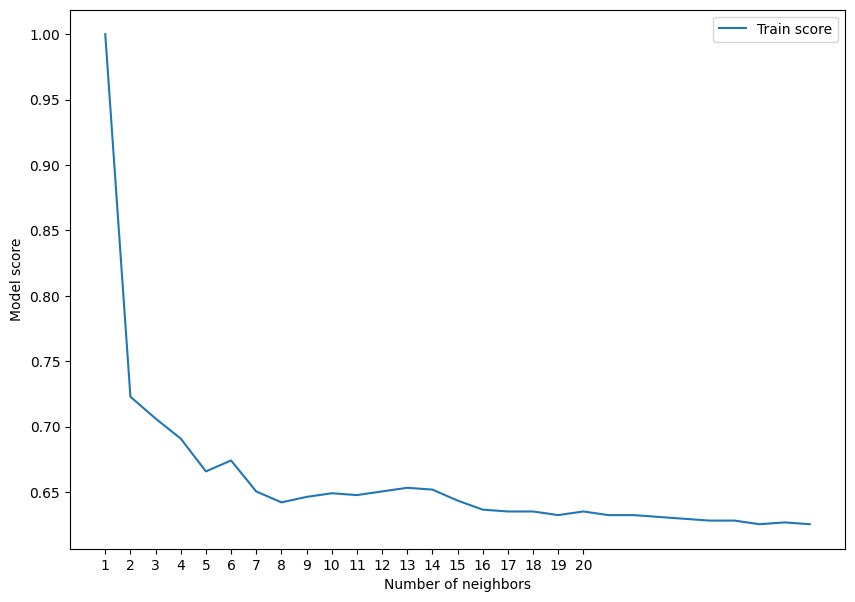

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 7))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")



In [190]:
knn_clf = KNeighborsClassifier(n_neighbors=27)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 62.53%
_______________________________________________
CLASSIFICATION REPORT:
              0           1     2          3           4  accuracy  \
precision   0.0    0.636364   0.0   1.000000    0.621969  0.625348   
recall      0.0    0.064220   0.0   0.074074    1.000000  0.625348   
f1-score    0.0    0.116667   0.0   0.137931    0.766931  0.625348   
support    45.0  109.000000  47.0  81.000000  436.000000  0.625348   

            macro avg  weighted avg  
precision    0.451666      0.587106  
recall       0.227659      0.625348  
f1-score     0.204306      0.498984  
support    718.000000    718.000000  
_______________________________________________
Confusion Matrix: 
 [[  0   0   0   0  45]
 [  0   7   0   0 102]
 [  0   0   0   0  47]
 [  0   4   0   6  71]
 [  0   0   0   0 436]]

Test Result:
Accuracy Score: 66.23%
_______________________________________________
CLASSIFICATION REPORT:
              0          1     2     3           4  accurac

c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.

In [ ]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned K-nearest neighbors", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)

tuning_results_df = pd.concat([tuning_results_df, results_df_2], ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,100.000000,67.207792
1,Tuned K-nearest neighbors,62.534819,66.233766


# 3. Support Vector Machine Hyperparameter Tuning

In [194]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Best params: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1     2     3      4  accuracy  macro avg  weighted avg
precision   1.0    1.0   1.0   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0   1.0   1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0   1.0   1.0    1.0       1.0        1.0           1.0
support    45.0  109.0  47.0  81.0  436.0       1.0      718.0         718.0
_______________________________________________
Confusion Matrix: 
 [[ 45   0   0   0   0]
 [  0 109   0   0   0]
 [  0   0  47   0   0]
 [  0   0   0  81   0]
 [  0   0   0   0 436]]

Test Result:
Accuracy Score: 67.21%
_______________________________________________
CLASSIFICATION REPORT:
              0          1     2          3           4  accuracy   macro avg  \
precision   0.0 

c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [195]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned Support Vector Machine", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
tuning_results_df = pd.concat([tuning_results_df, results_df_2], ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,100.000000,67.207792
1,Tuned K-nearest neighbors,62.534819,66.233766
2,Tuned Support Vector Machine,100.000000,67.207792


# 4. Decision Tree Classifier Hyperparameter Tuning

In [196]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Best_params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}
Train Result:
Accuracy Score: 67.69%
_______________________________________________
CLASSIFICATION REPORT:
              0           1     2          3           4  accuracy  \
precision   0.0    0.818182   0.0   0.812500    0.663093   0.67688   
recall      0.0    0.247706   0.0   0.320988    0.993119   0.67688   
f1-score    0.0    0.380282   0.0   0.460177    0.795225   0.67688   
support    45.0  109.000000  47.0  81.000000  436.000000   0.67688   

            macro avg  weighted avg  
precision    0.458755      0.618528  
recall       0.312363      0.676880  
f1-score     0.327137      0.592539  
support    718.000000    718.000000  
_______________________________________________
Confusion Matrix: 
 [[  0   1   0   2  42]
 [  0  27   0   1  81]
 [  0   0   0   0  47]
 [  0   5   0  26  50]
 [  0  

c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.

In [197]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned Decision Tree Classifier", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
tuning_results_df = pd.concat([tuning_results_df, results_df_2], ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,100.000000,67.207792
1,Tuned K-nearest neighbors,62.534819,66.233766
2,Tuned Support Vector Machine,100.000000,67.207792
3,Tuned Decision Tree Classifier,67.688022,69.805195


# 5. Random Forest Classifier Hyperparameter Tuning

In [198]:
n_estimators = [500, 900, 1100, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=5, verbose=1, n_jobs=-1)
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
364 fits failed with the following error:
Traceback (most recent call last):
  File "c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "c:\personal\Code\S

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Train Result:
Accuracy Score: 99.86%
_______________________________________________
CLASSIFICATION REPORT:
              0           1     2          3      4  accuracy   macro avg  \
precision   1.0    0.990909   1.0   1.000000    1.0  0.998607    0.998182   
recall      1.0    1.000000   1.0   0.987654    1.0  0.998607    0.997531   
f1-score    1.0    0.995434   1.0   0.993789    1.0  0.998607    0.997845   
support    45.0  109.000000  47.0  81.000000  436.0  0.998607  718.000000   

           weighted avg  
precision      0.998620  
recall         0.998607  
f1-score       0.998606  
support      718.000000  
_______________________________________________
Confusion Matrix: 
 [[ 45   0   0   0   0]
 [  0 109   0   0   0]
 [  0   0  47   0   0]
 [  0   1   0  80   0]
 [  0   0   0   0 436]]

Test Result:
Accuracy Score: 69.48%
__________________________

c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\personal\Code\S6\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [199]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned Random Forest Classifier", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
tuning_results_df = pd.concat([tuning_results_df, results_df_2], ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,100.000000,67.207792
1,Tuned K-nearest neighbors,62.534819,66.233766
2,Tuned Support Vector Machine,100.000000,67.207792
3,Tuned Decision Tree Classifier,67.688022,69.805195
4,Tuned Random Forest Classifier,99.860724,69.480519


# 6. XGBoost Classifier Hyperparameter Tuning

In [200]:
from scipy import stats

param_grid = dict(
    n_estimators=stats.randint(10, 1000),
    max_depth=stats.randint(1, 10),
    learning_rate=stats.uniform(0, 1)
)

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_cv = RandomizedSearchCV(
    xgb_clf, param_grid, cv=5, n_iter=150, 
    scoring='accuracy', n_jobs=-1, verbose=1
)
xgb_cv.fit(X_train, y_train)
best_params = xgb_cv.best_params_
print(f"Best paramters: {best_params}")

xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


KeyboardInterrupt: 

In [ ]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned XGBoost Classifier", train_score, test_score]], 
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
tuning_results_df = pd.concat([tuning_results_df, results_df_2], ignore_index=True)
tuning_results_df

In [ ]:
results_df

# 6. Features Importance According to Random Forest and XGBoost

In [203]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.Text
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [204]:
feature_imp(X, rf_clf).plot(kind='barh', figsize=(12,7), legend=False)

AttributeError: 'csr_matrix' object has no attribute 'Text'

In [ ]:
feature_imp(X, xgb_clf).plot(kind='barh', figsize=(12,7), legend=False)